In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importar Librerias y leer archivo de datos

In [0]:
#Importando librerias

import pandas as pd
import missingno as msno
import numpy as np
import scipy.stats.mstats as mstats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [0]:
# Leer archivos de datos

creditos=pd.read_csv ("/content/drive/My Drive/proyecto6/Credit.csv")


# Punto 1

## Revisar presencia de datos nulos.


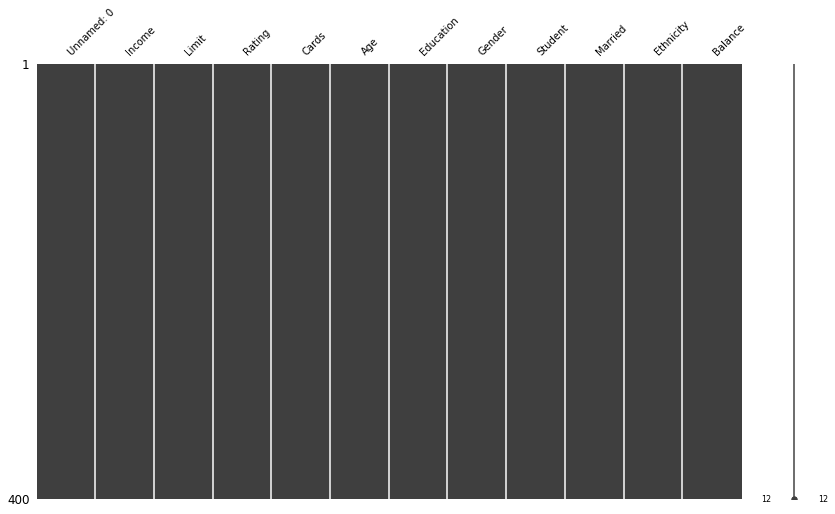

In [0]:
msno.matrix(creditos,figsize = (14,8), fontsize = 10);

Como se puede observar visualmente gracias a missigno, no existe presencia de datos nulos en la base de datos por los que no es necesario darle un tratamiento especial.

##  Identificación de variables categóricas y cuantitativas en la base de datos



*   **Income:** Cuantitativo
*   **Limit:** Cuantitativo
*   **Rating:** Cuantitativo
*   **Cards:** Cuantitativo
*   **Age:** Cuantitativo
*   **Education:** Categorico
*   **Gender:** Categorico
*   **Student:** Categorico
*   **Married:** Categorico
*   **Ethnicity:** Categorico
*   **Balance:** Cuantitativo







# Punto 2

## Ver datos Outliers

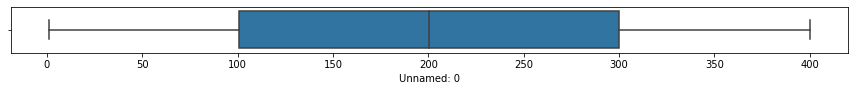

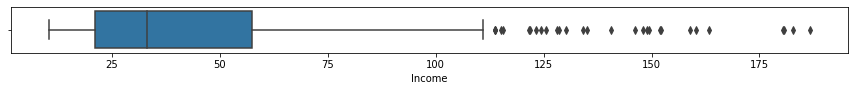

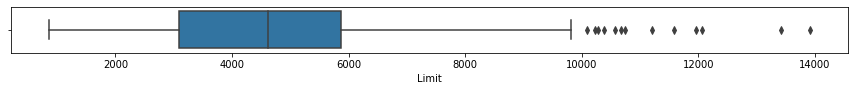

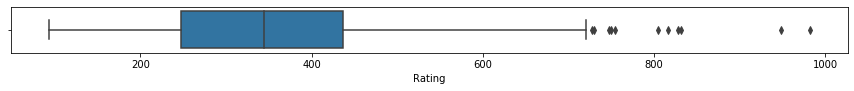

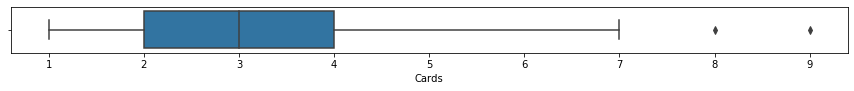

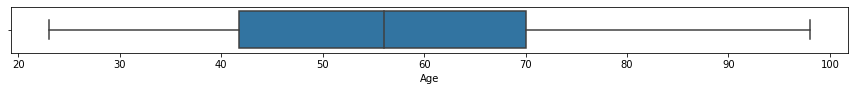

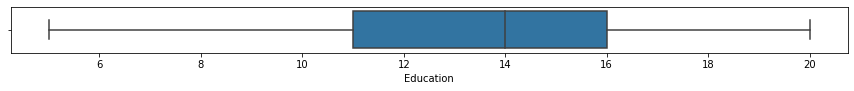

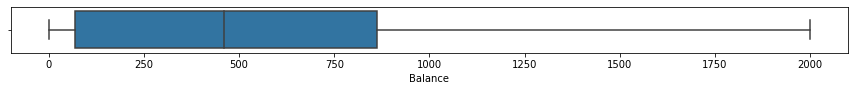

In [0]:
col_creditos = creditos[['Unnamed: 0','Income', 'Limit', 'Rating', 'Cards',"Age","Education","Balance"]]
for i, col in enumerate(col_creditos):
    plt.figure(figsize=(15,8))
    plt.subplot(8,1,i+1)
    sns.boxplot(col_creditos[col])


Como podemos observar si existen datos outliers en la base de datos. En income podemos ver que existen varios outliers pero estos se refieren a diferencias de sueldos entre las personas que tenemos en la base de datos, pero estos son razonables con lo que puede ganar una persona en miles de dolares al año. Asi como limit, rating y cards son razonables dependiendo suponiendo un criterio bancario relacionado con las variables de riesgo crediticio que pueda tener como politica. En conclusión, según mi supuesto, no es necesario eliminar o modificar estos datos ya que ademas son datos que si pueden influir en los siguiente analisis que vamos a realizar.

# Punto 3

## Análisis exploratorio de variables

In [0]:
#para revisar las media, mediana, minimos, maximos y otros de las diferentes variables del dataframe.
col_creditos.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


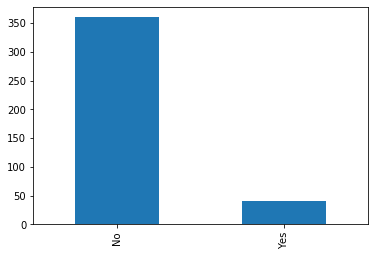

In [0]:
#si los clientes son estudiantes o no
creditos.Student.value_counts().plot(kind='bar');

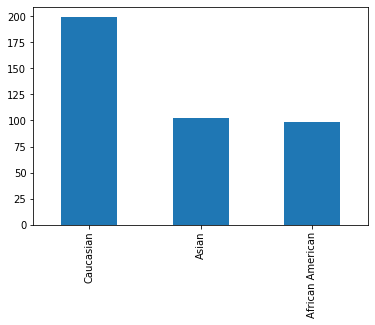

In [0]:
#Clasificacion por etnias
creditos.Ethnicity.value_counts().plot(kind='bar');

Female    207
 Male     193
Name: Gender, dtype: int64


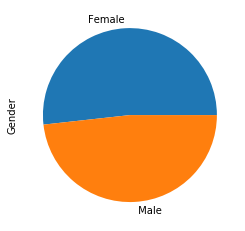

In [0]:
#cantidad de hombres y mujeres
fm2=creditos.Gender.value_counts()
print(fm2)
creditos.Gender.value_counts().plot(kind='pie');

In [0]:
#mejores ranking de creditos
creditos.sort_values(by="Rating",ascending=False).head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
323,324,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian,1999
28,29,186.634,13414,949,2,41,14,Female,No,Yes,African American,1809
355,356,180.682,11966,832,2,58,8,Female,No,Yes,African American,1405
85,86,152.298,12066,828,4,41,12,Female,No,Yes,Asian,1779
293,294,140.672,11200,817,7,46,9,Male,No,Yes,African American,1677


In [0]:
#mayores ingresos anuales
creditos.sort_values(by="Income",ascending=False).head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
28,29,186.634,13414,949,2,41,14,Female,No,Yes,African American,1809
323,324,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian,1999
355,356,180.682,11966,832,2,58,8,Female,No,Yes,African American,1405
261,262,180.379,9310,665,3,67,8,Female,Yes,Yes,Asian,1050
275,276,163.329,8732,636,3,50,14,Male,No,Yes,Caucasian,529


In [0]:
#los clientes con mas edad
creditos.sort_values(by="Age",ascending=False).head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
323,324,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian,1999
209,210,151.947,9156,642,2,91,11,Female,No,Yes,African American,732
128,129,123.299,8376,610,2,89,17,Male,Yes,No,African American,1259
139,140,107.841,10384,728,3,87,7,Male,No,No,African American,1597
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872


In [0]:
#los mayores pormedios de deuda
creditos.sort_values(by="Balance",ascending=False).head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
323,324,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian,1999
28,29,186.634,13414,949,2,41,14,Female,No,Yes,African American,1809
85,86,152.298,12066,828,4,41,12,Female,No,Yes,Asian,1779
191,192,124.290,9560,701,3,52,17,Female,Yes,No,Asian,1687
293,294,140.672,11200,817,7,46,9,Male,No,Yes,African American,1677


# Punto 4

## Matriz de correlación

In [0]:
#Este codigo sirve para cambiar las variables que son cualitativas por cuantivativas

#se genera una variable solo con las variables cuantitativas
x= creditos[['Income','Limit','Rating','Cards','Age','Education','Balance']]
#se genera las variables cuantitativas de las cualitativas y el drop sirve para eliminar la primera columna (sino genera dos columnas con valores opuestos en el caso que tengan solo 2 variables, en el caso de 3 variables elimina una y por ejemplo si ambas de las que quedan no tienen datos, significa que es la tercera variable)
enbi = pd.get_dummies(data=creditos[['Gender','Student','Married','Ethnicity']], drop_first=True)
#se genera una nueva variable con la suma de de las variables de arriba, x y enbi
creditos01= enbi.add(x,fill_value=0)

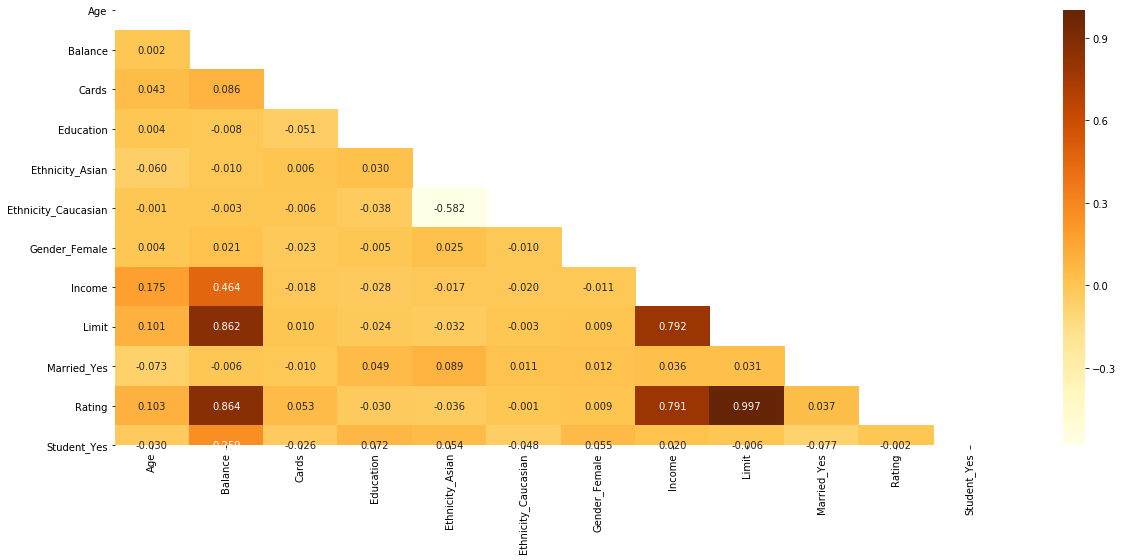

In [0]:
#para generar una matriz de correlacion sin datos repetidos

mask = np.zeros_like(creditos01.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,8))
sns.heatmap(creditos01.corr(method='pearson'),annot=True,fmt='.3f',
            mask=mask, cmap='YlOrBr');
plt.yticks(rotation=0)
plt.show()

Los datos que se encuentran en color mas oscuros son los que tienen mas correlacion positiva, en cambio los que se encuentran mas en blanco y con valor negativo significa que tienen correlacion negativa. 


---


En el caso de las correlaciones positivas mayores a 0,75 son:

*   Con Limit (limite de credito), existe una correlacion de 0,997 con la variable Rating (Ranking de credito). Tambien existe correlacion de limit con Balance (promedio de deuda) en una correlacion de 0,864. al) Y por ultimo Limit tienen una correlacion grande con con income (Ingreso anual) por 0,792.
*   Con rating existe una correlacion alta con balance por 0,864 y tambien una correlacion con income por 0,791.

En el caso de las correlaciones negativas solo existe una correlacion inversa que es elata de -0,582 y son entre las diferentes etnias, como la Asiatica (Ethnicity_Asian) y la caucasica (Ethnicity_Caucasian).







In [0]:
#esta matriz de corralacion la realice porque la funcion de arriba en colab no se muestran completos los datos por el corte, asi que para comprobar esos datos hice esta matriz completa
creditos01.corr(method='pearson').round(3).style.background_gradient(cmap='YlOrBr')

,Age,Balance,Cards,Education,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Income,Limit,Married_Yes,Rating,Student_Yes
Age,1,0.002,0.043,0.004,-0.06,-0.001,0.004,0.175,0.101,-0.073,0.103,-0.03
Balance,0.002,1,0.086,-0.008,-0.01,-0.003,0.021,0.464,0.862,-0.006,0.864,0.259
Cards,0.043,0.086,1,-0.051,0.006,-0.006,-0.023,-0.018,0.01,-0.01,0.053,-0.026
Education,0.004,-0.008,-0.051,1,0.03,-0.038,-0.005,-0.028,-0.024,0.049,-0.03,0.072
Ethnicity_Asian,-0.06,-0.01,0.006,0.03,1,-0.582,0.025,-0.017,-0.032,0.089,-0.036,0.054
Ethnicity_Caucasian,-0.001,-0.003,-0.006,-0.038,-0.582,1,-0.01,-0.02,-0.003,0.011,-0.001,-0.048
Gender_Female,0.004,0.021,-0.023,-0.005,0.025,-0.01,1,-0.011,0.009,0.012,0.009,0.055
Income,0.175,0.464,-0.018,-0.028,-0.017,-0.02,-0.011,1,0.792,0.036,0.791,0.02
Limit,0.101,0.862,0.01,-0.024,-0.032,-0.003,0.009,0.792,1,0.031,0.997,-0.006
Married_Yes,-0.073,-0.006,-0.01,0.049,0.089,0.011,0.012,0.036,0.031,1,0.037,-0.077


## scatterplots por medio de una función

In [0]:
def graficos (i,j):

  cred=plt.figure(figsize=(20,7))
  sns.scatterplot(x=creditos[i],y=creditos[j])
  #plt.title("Relación entre"+ i +"y" j,fontsize=14)
  plt.show()


**Variables para revisar en la función graficos:**

* `Income`: Ingreso anual disponible en miles de dólares.
* `Limit`: Límite del crédito.
* `Rating`: Ranking del crédito.
* `Cards`: Cantidad de tarjetas de crédito.
* `Age`: Edad del usuario.
* `Education`: Años de educación del usuario.
* `Gender`: ¿Hombre o mujer?
* `Student`: ¿Es estudiante?
* `Married`: ¿Está casado?
* `Ethnicity`: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* `Balance`: Promedio de deuda en tarjeta de crédito de usuario.


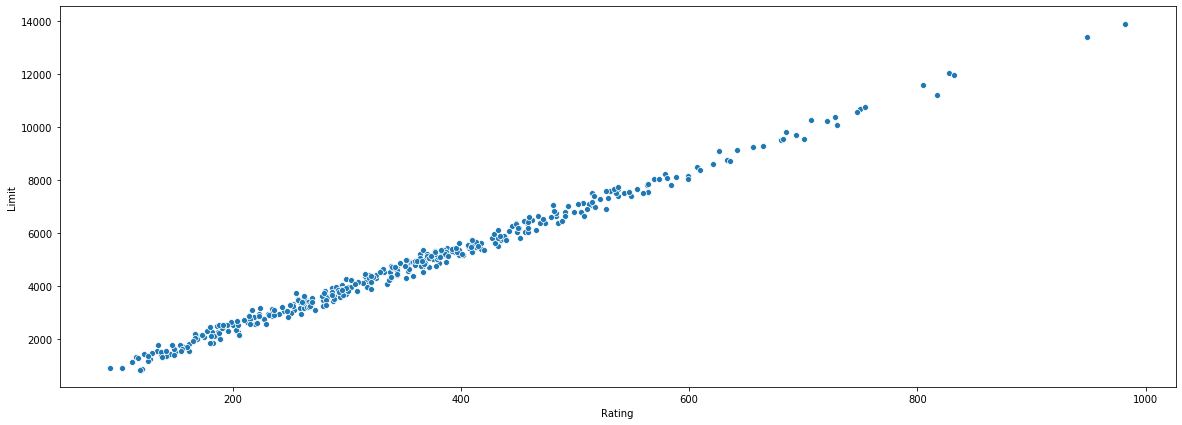

In [0]:
graficos ("Rating","Limit")

# Punto 5

## Generacion de histogramas y que además identifique de manera visual la media y mediana. 

In [0]:
def histograma (df,et):

#para crear las variables de media y mediana
  data=df[et]
  maxi=data.max()
  mini=data.min()
  r=maxi-mini
  mean = data.mean()
  median = data.median()  
  n=data.shape[0]
  k=1+3.322*np.log(n)
  if int(k)%2==0:
    k=int(k)+1
  else:
    k=int(k)    

#para plotear el histograma
  plt.figure(figsize=(15,8))
  datau=data.plot(kind="hist", color='yellow',log=False,label=True).set_title("Distribucion de frecuencia {0}".format(et.upper()),fontsize=20, color='blue')
  plt.axvline(mean, color='b', linestyle='--')
  plt.axvline(median, color='r', linestyle='--')
  data=pd.cut(data,k, precision=0).value_counts().sort_index()
  data=data.to_frame()


#para imprimir los datos de la media y mediana
  print(f"La media es : {(mean)}")
  print(f"La mediana es : {(median)}") 
  
  return data



**Variables para revisar en la función histogramas:**

dataframe: creditos

* `Income`: Ingreso anual disponible en miles de dólares.
* `Rating`: Ranking del crédito.
* `Cards`: Cantidad de tarjetas de crédito.
* `Balance`: Promedio de deuda en tarjeta de crédito de usuario.

La media es : 354.94
La mediana es : 344.0


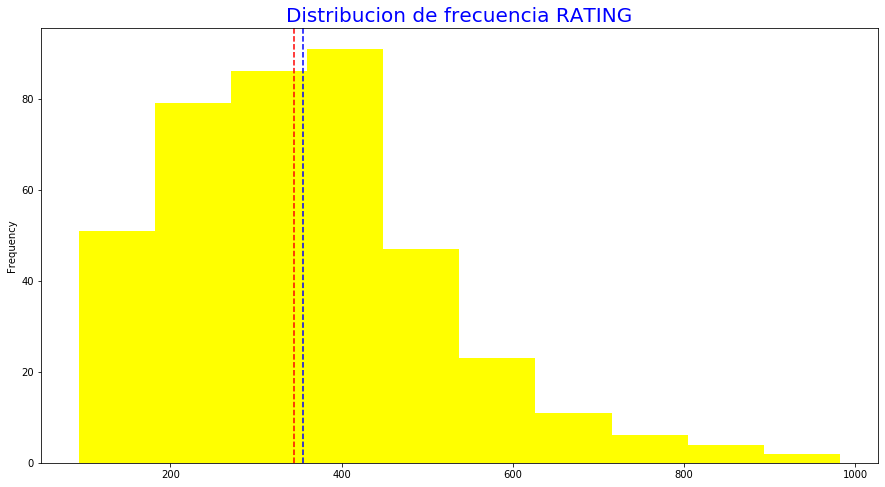

In [0]:
histograma(creditos,"Rating");



*   **Balance:** la frecuencia en promedio de deuda personal se observa que incrementa  rapido, pero posteriomente existe una menor frecuencia a medida que el promedio de deuda personal aumenta

*   **Income:** la frecuencia en el ingreso anual se ve que crece muy rapido pero esta decae mientras los sueldos son mas y mas altos.

*   **Cards:** la mayor parte de frecuencia en la cantidad de tarjetas por persona esta entre 2 y 3 tarjetas, donde la media y mediana está en las 3 tarjetas. No hay frecuencia con 4 tarjetas y posterior a 5 tarjetas la frecuencia va desapareciendo hasta llegar a 8 tarjetas.

*   **Rating:** podemos observar que la mayor frecuencia la concentran personas que se encuentran bajo los 500 puntos de rating, ademas la media y mediana se encuentran entre los 350 puntos. Muy poca frecuencia tiene mejor rating y por ende mejores opciones de credito por ser personas con menor riesgo de no pago.







  # "Rating" aqui se puede observar que la media del universo tiene un credito malo y que un poco porcentaje de la muestra tiene un credito justo bueno o excelente
    # Por debajo de 600 puntos: mal crédito
    #Entre 600 y 649 puntos: crédito pobre
    #Entre 650 y 699 puntos: crédito justo
    #Entre 700 y 749 puntos: buen crédito
    #750 y más puntos: excelente crédito
  # "Cards" el promedio de la gente tiene entre 2 y 3 tarjeta de credito.

# Punto6

## Regresion Lineal

### Regresion de Balance con Student

In [0]:
X = creditos01["Student_Yes"]
Y = creditos01['Balance']

X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.49e-07
Time:                        02:49:37   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         480.3694     23.434     20.499      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Regresion de balance con income

In [0]:
X = creditos01["Income"]# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = creditos01['Balance']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.03e-22
Time:                        02:49:37   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.5148     33.199      7.425      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Regresion de balance con Rating

In [0]:
X = creditos01["Rating"]# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = creditos01['Balance']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.90e-120
Time:                        02:49:37   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -390.8463     29.069    -13.446      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### conclusion punto 6 

podemos comprar las 3 regresiones y según R-squared de las 3 variables compraradas, la que es mas influyente en balance es rating ya que es la que por lejos se acerca mas al valor 1

# Punto7

## regresion de balance con multiples variables 

In [0]:
X = creditos01[['Age','Cards', 'Education', 'Ethnicity_Asian','Ethnicity_Caucasian', 'Gender_Female', 'Income', 'Limit','Married_Yes', 'Rating', 'Student_Yes']]
Y = creditos01['Balance']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.11e-253
Time:                        02:49:37   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -479.2079    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


podemos observar que en este modelo al 95% (no se consideran el 2.5% de los extremos) que se encuentra bastante ajustado para ser considerado como correcto ya que se encuentra cercano al 1 el R-squared, si fuera 1 el modelo estaria sobre ajustado a la realidad y solo serviria para predecir las variables revisadas y no para otros modelos

# Punto 8


## Las tres principales determinantes de la regresion

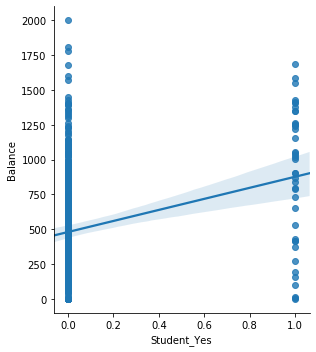

In [0]:
sns.lmplot(x='Student_Yes', y="Balance", data=creditos01,aspect=.9);

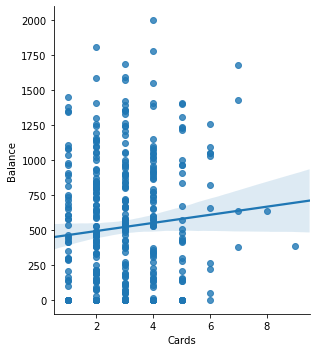

In [0]:
sns.lmplot(x='Cards', y="Balance", data=creditos01,aspect=.9);

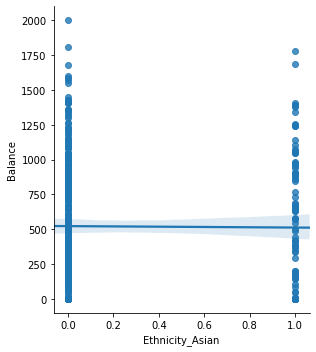

In [0]:
sns.lmplot(x='Ethnicity_Asian', y="Balance", data=creditos01,aspect=.9);

# Punto 9


In [0]:
X = creditos01[['Cards', 'Education','Income', 'Limit', 'Rating', 'Student_Yes']]
Y = creditos01['Balance']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 


print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1366.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.15e-259
Time:                        02:49:38   Log-Likelihood:                -2402.5
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     393   BIC:                             4847.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -508.7119     30.287    -16.797      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Apesar que no se consideraron las variables que estaban sobre 0.025 en P values, cambio demasiado poco el R-Squared, de 0,955 a 0,954, lo que significa que las variables que no consideramos en esta ocasion, no son influyentes en el modelo de regresion que tenemos.